# Relatório de Implementação - Triangulação de Polígonos

* **ALUNO**: Felipe Alves Ferreira
* **MATRÍCULA**: 1921167

### Triangulação no Polígono1

![alt text](https://github.com/feliferr/computational-geometry/blob/master/triangulation/images/triangulation_polygon1.png?raw=true)

### Triangulação no Polígono2

![alt text](https://github.com/feliferr/computational-geometry/blob/master/triangulation/images/triangulation_polygon2.png?raw=true)

## Código-fonte

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import math
from scipy import spatial

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df_polygon1 = pd.read_csv("/content/drive/My Drive/geometria_computacional/polygon1.txt", sep="   ", header=None, names=["x","y"])
df_polygon2 = pd.read_csv("/content/drive/My Drive/geometria_computacional/polygon2.txt", sep="   ", header=None, names=["x","y"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [0]:
from itertools import chain

import numpy as np

def pares_circulares(iterable):
    iterable = iter(iterable)
    first = last = next(iterable)
    for x in iterable:
        yield last, x
        last = x
    yield (last, first)

def near_zero(v):
    if isinstance(v, (float, int)):
        return v > -1E-6 and v < 1E-6
    else:
        return np.allclose(v, np.zeros(np.shape(v)))

def calcula_normal(polygon):
    sum = 0
    for (x1, y1), (x2, y2) in pares_circulares(polygon):
        sum += (x2 - x1) * (y2 + y1)
    if sum > 1E-6:
        return 1
    elif sum < -1E-6:
        return -1
    else:
        raise ValueError("Nenhuma normal encontrada")

def fatias_circulares(seq, start, count):
    l = len(seq)
    for i in range(start, start + count):
        yield seq[i % l]

def fatias_circulares_inv(seq, start, count):
    if start + count > len(seq):
        return seq[start + count - len(seq): start]
    else:
        return chain(seq[:start], seq[start + count:])

def existe_pontos_no_triangulo(triangle, points):
    a, b, c = triangle
    s = b - a
    t = c - a
    stack = [s, t]
    if len(s) == 3:
        stack.append(np.cross(s, t))
    mtrx = np.linalg.inv(np.vstack(stack).transpose())
    if len(s) == 3:
        mtrx = mtrx[:2]
    for point in points:
        ps, pt = np.dot(mtrx, point - a)
        if ps >= 0 and pt >= 0 and ps + pt <= 1:
            return True
    return False

def triangulacao(polygon):

    polygon = [np.array(x) for x in polygon]
    normal = calcula_normal(polygon)
    i = 0
    while len(polygon) > 2:
        (a, b, c) = fatias_circulares(polygon, i, 3)
        triangle = (a, b, c)
        if ((a == b).all() or (b == c).all()):
            # Pulando vertices duplicados
            del polygon[(i + 1) % len(polygon)]
            continue

        x = np.cross(c - b, b - a)
        dot = np.dot(normal, x)
        yld = False
        if dot > 1E-6:
            triangle = (a, b, c)
            if not existe_pontos_no_triangulo(triangle,
                                         fatias_circulares_inv(polygon, i, 3)):
                del polygon[(i + 1) % len(polygon)]
                yield triangle
                i = 0
                yld = True
        if not yld:
            i += 1

def plot_triangulacao(df, x_list, y_list):
    xs = df['x'].tolist()
    ys = df['y'].tolist()

    xs.append(df['x'].values[0])
    ys.append(df['y'].values[0])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(x_list,y_list)
    plt.plot(xs,ys)
    plt.scatter(xs, ys)
    for xy in zip(xs, ys):                                       # <--
        ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # 
    plt.show()

def getPolygonPoints(df):
	xs = df['x'].tolist()
	ys = df['y'].tolist()
	lista = []
	for i in range(len(xs)):
		lista.append((xs[i],ys[i]))	
	return lista

def make_triangulation(df):
    poly = getPolygonPoints(df)
    print("--> polygon: {}".format(poly))
    tris = list(triangulacao(poly))
    print("--> triangulation: {}".format(tris))

    x_list = []
    y_list = []
    for triangle in tris:
        x_list.append(triangle[0][0])
        y_list.append(triangle[0][1])

        x_list.append(triangle[1][0])
        y_list.append(triangle[1][1])

        x_list.append(triangle[2][0])
        y_list.append(triangle[2][1])
    
    plot_triangulacao(df, x_list, y_list)

--> polygon: [(595, 379), (509, 399), (483, 479), (439, 480), (429, 444), (321, 444), (363, 474), (240, 474), (278, 440), (232, 356), (323, 376), (321, 305), (415, 370), (389, 294), (482, 358)]
--> triangulation: [(array([509, 399]), array([483, 479]), array([439, 480])), (array([509, 399]), array([439, 480]), array([429, 444])), (array([509, 399]), array([429, 444]), array([321, 444])), (array([321, 444]), array([363, 474]), array([240, 474])), (array([321, 444]), array([240, 474]), array([278, 440])), (array([509, 399]), array([321, 444]), array([278, 440])), (array([595, 379]), array([509, 399]), array([278, 440])), (array([278, 440]), array([232, 356]), array([323, 376])), (array([595, 379]), array([278, 440]), array([323, 376])), (array([323, 376]), array([321, 305]), array([415, 370])), (array([595, 379]), array([323, 376]), array([415, 370])), (array([415, 370]), array([389, 294]), array([482, 358])), (array([595, 379]), array([415, 370]), array([482, 358]))]


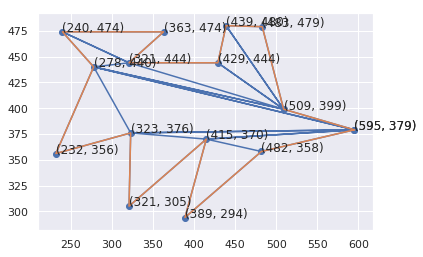

--> polygon: [(331, 235), (369, 90), (403, 236), (561, 230), (419, 297), (464, 419), (363, 318), (255, 413), (306, 292), (190, 236)]
--> triangulation: [(array([331, 235]), array([369,  90]), array([403, 236])), (array([403, 236]), array([561, 230]), array([419, 297])), (array([331, 235]), array([403, 236]), array([419, 297])), (array([331, 235]), array([419, 297]), array([464, 419])), (array([331, 235]), array([464, 419]), array([363, 318])), (array([331, 235]), array([363, 318]), array([255, 413])), (array([331, 235]), array([255, 413]), array([306, 292])), (array([331, 235]), array([306, 292]), array([190, 236]))]


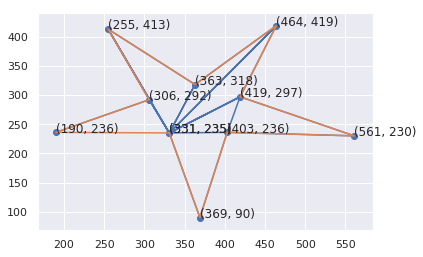

In [5]:
make_triangulation(df_polygon1)
make_triangulation(df_polygon2)